# 1.1

cfg._target_ 값이 diffusion_policy.workspace.train_diffusion_unet_lowdim_workspace.TrainDiffusionUnetLowdimWorkspace → 해당 클래스를 인스턴스화하여 실행.

여기서 클래스를 인스턴스화 한다는 것에 대해서 설명

In [1]:
"""
클래스를 사용해서 객체(object)를 만드는 과정을 인스턴스화 라고 한다.
클래스를 만들면 클래스 기반으로 여러개의 객체 인스턴스를 생성 할 수 있다. 
이를 클래스에서 __init__()을 통해 새로운 객체를 만들 때 인스턴스화 했다고 표현
"""
class Car:
    def __init__(self, brand):
        self.brand = brand #속성

    def drive(self):
        print(f"{self.brand} 자동차가 출발합니다.")

# 인스턴스 생성
my_car = Car("Hyundai") #car 클래스를 이용해 인스턴스 생성

# 인스턴스 사용
print(my_car.brand)
my_car.drive()

Hyundai
Hyundai 자동차가 출발합니다.


이해가 가십니까? 인스턴스는 클래스를 그냥 사용하는 무언가를 정의 했을 때, 뉘양스가 인스턴스 사용임.

hydra를 사용하면 yaml 설정 파일에서 클래스를 경로를 지정하고 , 이를 기반으로 자동으로 객체를 생성할 수 있음


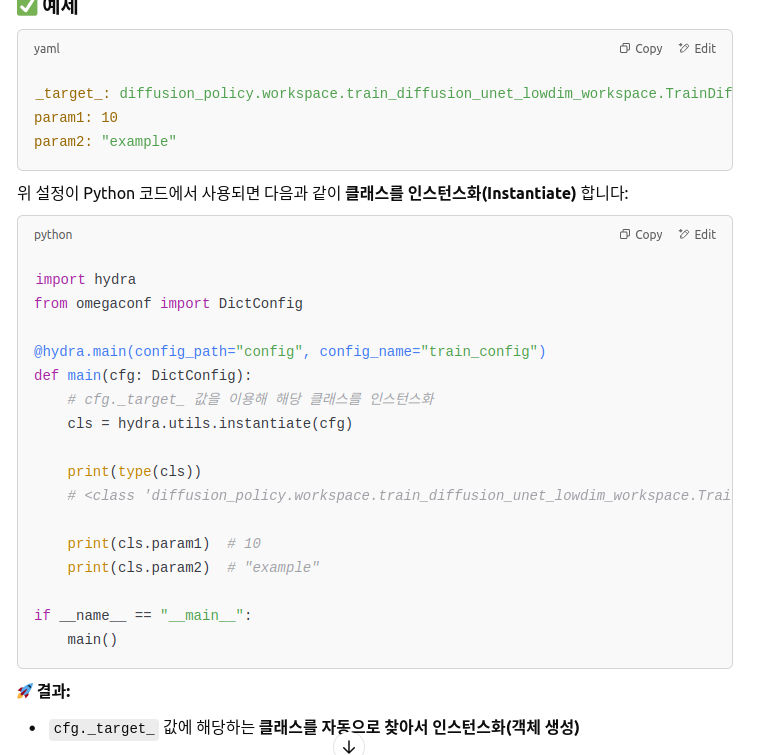

# 1.2 DataLoader 란?

pytorch의 dataloader는 데이터를 미니배치(batch) 단위로 불러오고, 셔플 및 병렬 처리(worker)등을 지원하는 객체이다. 

ex) 배치 사이즈 batch_size : 256은 한번에 몇개의 샘플(데이터)를 모델에 입력할지 설정, 
예시로 데이터셋의 크기가 50,000 이고 batch_size=256이면 총 (50000 / 256) = 196 번(step) 학습해야 1 epoch 완료이다. 

batch_size 가 크면 훈련속도는 빨라지지만 gpu의 메모리가 필요. 보통 일반적으로 16~512 가 적정.

### worker

데이터를 병렬로 로드하는 프로세스 갯수
num_worker = 0 이면 메인 프로세스에서 데이터 로딩(속도 느림)
num_worker = 1 이면 데이터 로딩으로 위한 별도 프로세스 1개 사용
num_worker > 1 이면 여러 프로세스를 사용하여 데이터를 더 빠르게 불러옴

일반적인 설정 
num_workers=0 → CPU 사용량이 낮고, 디버깅할 때 유용
num_workers=1~4 → 소규모 데이터셋에서 적절
num_workers=4~8 → 대규모 데이터셋에서 빠른 데이터 로딩
num_workers=8+ → SSD + 강력한 CPU 환경에서 추천

일반적으로 num_workers = cpu 코어 개수의 절반 ~2/3 로 설정하는 것이 좋음

### shuffle

데이터를 랜덤하게 섞을지 여부
shuffle=True → 매 epoch마다 데이터 순서를 랜덤하게 섞음 (일반적으로 훈련 데이터에는 사용)
shuffle=False → 데이터 순서를 유지 (테스트 데이터에는 보통 사용)

shuffle=True를 사용하면 모델이 특정 데이터 순서에 과적합(overfitting)하는 것을 방지
shuffle=False는 데이터 순서를 유지하기 때문에 재현 가능한 실험을 위해 테스트 데이터에서 사용됨

In [3]:
# 예제 
from torch.utils.data import DataLoader, Dataset
import torch

# 더미 데이터셋 생성
class MyDataset(Dataset):
    def __init__(self):
        self.data = torch.arange(1000)  # 0 ~ 999의 데이터셋

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# 데이터셋 인스턴스 생성
dataset = MyDataset()

# DataLoader 생성 (YAML 설정 반영)
dataloader = DataLoader(
    dataset,
    batch_size=256,  # 한 번에 256개 데이터 로드
    shuffle=True,    # 데이터를 랜덤하게 섞음
    num_workers=1    # 데이터 로딩에 1개의 병렬 프로세스 사용
)

# 데이터 로드 예제
for batch in dataloader:
    print(batch)
    break  # 첫 배치만 출력


/home/choi/anaconda3/envs/robodiff/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


tensor([382, 977,   1, 110, 871, 901, 848, 263, 503, 409,  76, 917, 598, 241,
        159, 785, 997, 945, 869,  57, 734, 549, 838, 925,  27, 472, 814, 483,
        823, 991, 305, 310, 142, 886,  16, 769, 842, 944, 208, 811, 374, 783,
        459, 692,  73, 873,  38, 593, 771, 978, 935, 470, 878,  65, 892, 683,
        675, 765, 542, 987, 136, 618, 767, 375, 880, 286, 198, 548, 132, 396,
        387,   4, 799,  13, 389, 185, 659,  89, 391, 248, 296, 545, 986, 114,
        171, 240, 921, 346, 186, 656, 268, 588, 796,  53, 964, 370, 393, 753,
        775, 733, 700, 875, 476, 865, 667, 586, 381, 544, 415, 366, 495, 639,
        537, 196, 906, 943, 245, 898, 302, 961, 766, 319, 357, 170,  59,   6,
        371, 915,  20, 647, 473, 883, 776, 825, 572, 109, 484, 462, 957, 247,
        570, 173, 665, 760, 363, 745, 800, 705, 689, 148, 468, 553, 861, 317,
        378,  15, 590,  97, 100, 818, 517, 822, 658, 140, 902, 358, 884, 308,
        832, 222,   8, 949, 699,  71, 954, 149, 430, 416, 477, 3

## 궁금증 1 cpu 코어 갯수 확인법
os 랑 multiprocessing에 cpu_count 사용

In [4]:
# 내 컴퓨터 코어 갯수 python 코드로 확인 
import os
import multiprocessing

print("총 CPU 개수:", os.cpu_count())  # 모든 논리 코어 개수
print("사용 가능한 CPU 개수:", multiprocessing.cpu_count())  # 실제 사용 가능한 코어 개수


총 CPU 개수: 12
사용 가능한 CPU 개수: 12


## 궁금증 2 val train test data는 어떻게 다름?


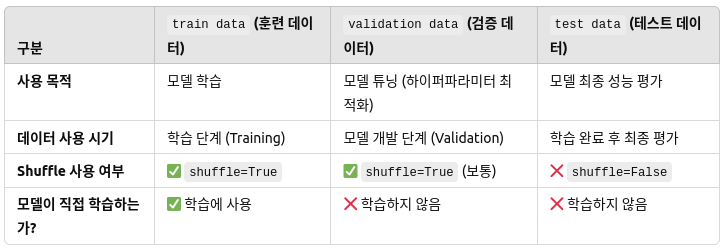

# 1.3
### adam 옵티마이저 ###

adam(adaptive moment estimation)은 sgd(stochastic gradient descent) + 모멘텀 + RMSprop의 개념을 결합한 적응형 학습률 옵티마이저 이다. -> 빠른 학습 + 적응형 학습률 + 안정적인 최적화 목표



핵심 개념 
1. 모멘텀(Momentum) 적용 -> 이전 기울기의 영향을 반영하여 빠르게 학습
2. RMSprop 적용 -> 각 파라미터마다 개별적인 학습률을 설정 

adam은 모멘텀을 추가하면서도 학습률을 적응적으로 조정하는 최적화 기법. 

이거 내용 조금은 아이패드 adam & adamW 에 정리하였음 
pytorch 시각화 그래프

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

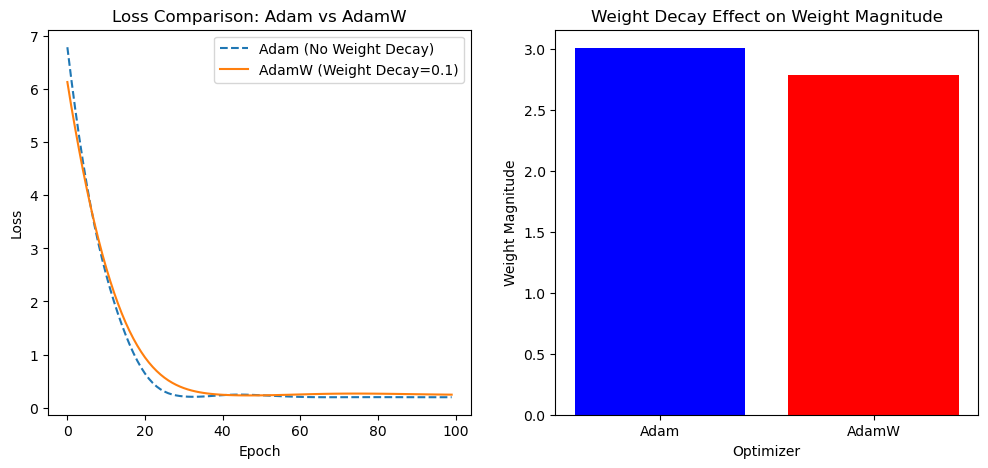

In [4]:
# 더미 데이터 생성 
torch.manual_seed(42)
X = torch.randn(100, 1)
Y = 3 * X + torch.randn(100, 1) * 0.5 # y = 3x + 노이즈

# 간단한 모델 (선형 회귀)

model1 = nn.Linear(1, 1)
model2 = nn.Linear(1, 1)

# 옵티마이저

optimizer_adam = optim.Adam(model1.parameters(), lr=0.1, weight_decay=0)
optimizer_adamw = optim.AdamW(model2.parameters(), lr=0.1, weight_decay=0.1)

#손실함수
criterion = nn.MSELoss()

# 리스트로 학습과정 저장 
loss_adam = []
loss_adamw = []

#학습 루프 
for epoch in range(100):
    for model, optimizer, loss_list in zip([model1, model2], [optimizer_adam, optimizer_adamw], [loss_adam, loss_adamw]):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, Y)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.item())
    
# 그래프 출력
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(loss_adam, label="Adam (No Weight Decay)", linestyle="--")
plt.plot(loss_adamw, label="AdamW (Weight Decay=0.1)", linestyle="-")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Comparison: Adam vs AdamW")
plt.legend()

# 가중치 크기 비교
weights_adam = list(model1.parameters())[0].detach().numpy().flatten()
weights_adamw = list(model2.parameters())[0].detach().numpy().flatten()

plt.subplot(1, 2, 2)
plt.bar(["Adam", "AdamW"], [abs(weights_adam[0]), abs(weights_adamw[0])], color=["blue", "red"])
plt.xlabel("Optimizer")
plt.ylabel("Weight Magnitude")
plt.title("Weight Decay Effect on Weight Magnitude")

plt.show()

# 1.4
## L2 정규화 (Regularization)

L2 정규화는 모델의 가중치 weight를 너무 크게 만드는 것을 방지하여 과적합을 줄이는 기법이다. L2 정규화는 weight decay와 같은 개념으로 사용한다. 
자세한 것은 아이패드에 

#### 2 
- train.py -> traindiffusionUnetlowdimworkspace.run()-> DiffusionUnetLowDimPolicy 이런식으로 현재 진행중임 

### 2.1 DiffusionUnetLowdimPolicy의 역할 

- DiffusionUnetLowdimPolicy는 Diffusion 기반 행동 예측 모델이다. 

주요기능 
1) Diffusion 모델(ConditionalUnet1D)를 사용하여 행동(action)예측
2) 노이즈스케줄러(DDPMScheduler)를 이용하여 Diffusion과정 관리
3) inference(예측) predict_action()
4) training(학습) compute_loss()

# 2.2

- local conditioning의 기본개념

- 전체 시퀀스가 아닌 일부 (보통 초기 타임스텝)의 관측 데이터를 조건으로 모델에 제공하는 전략

ex) 시간 시퀀스 데이터에서 처음 몇 타임스텝(t=0 부터 t=T_0 - 1)의 관측 정보를 확실하게 주고, 나머지 미래의 시퀀스를 모델이 생성하도록 유도

why we use? 

1) 초기 컨텍스트 제공 : 미래의 행동이나 시퀀스를 예측할 때, 초반의 주어진 확실한 정보를 활용하면 모델이 보다 안정적이고, 현실성있는 예측이 가능하다

2) 모델의 자유도 조절 : 전체 시퀀스를 조건으로 주면 모델이 조건에 과도하게 의존할 수 있지만, 초기 정보만 제공하면 모델이 나머지 부분을 자유롭게 생성하도록 유도할 수 있다. 

3) 시간적 구조 보존 : 시퀀스의 앞부분은 정확한 정보로 고정하고, 이후 부분에서 변화하는 동적 패턴을 학습할 수 있다.

In [ ]:
local_cond = torch.zeros(size=(B, T, Do), device=device, dtype=torch.float32)
# 여기서는 (B, T, Do) 크기의 텐서를 만들어 0으로 초기화

local_cond[:, : To] = nobs[:, : To]
# 슬라이싱: local_cond[:, :To]는 모든 배치에 대해 처음 To 타임스텝을 선택
#nobs[:, :To] 역시 정규화된 관측 데이터의 처음 To 타임스텝을 의미한다
# 관측 데이터의 초기 T0 타임스텝만 실제 값으로 채우고, 나머지 T - T_0 타임 스텝은 그대로 0으로 남겨둔다
# 이렇게 하면 모델은 처음 T0타임스텝에 대한 확실한 정보를 조건으로 사용하고, 이 후의 타임스텝은 생성 과정에 맡기게 된다.
shape = (B, T, Da)

cond_data = torch.zeros(shape, device=device, dtype=torch.float32)
cond_mask = torch.zeros_like(cond_data, dtype=torch.bool)

1) B: 배치크기
2) T: 전체 시퀀스 길이(horizon, 예측할 전체 타임스텝 수)
3) Do: 관측값의 차원(observation dimension) #obs
4) Da: 행동(action)차원
5) To: 관측에 사용할 타임스텝 수, 즉 self.n_obs_steps
6) nobs: 정규화된 관측 데이터, shape는 (B, L, Do)인데, L가 시퀀스 길이나 적어도 To가 유효한 관측 정보이다. 


### 예시 


/home/choi/anaconda3/envs/robodiff/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Original Observations (nobs):
tensor([[[ 0.0000e+00],
         [ 6.4279e-01],
         [ 9.8481e-01],
         [ 8.6603e-01],
         [ 3.4202e-01],
         [-3.4202e-01],
         [-8.6603e-01],
         [-9.8481e-01],
         [-6.4279e-01],
         [-2.4493e-16]]])

Local Conditioned Data (local_cond):
tensor([[[0.0000],
         [0.6428],
         [0.9848],
         [0.8660],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000],
         [0.0000]]])


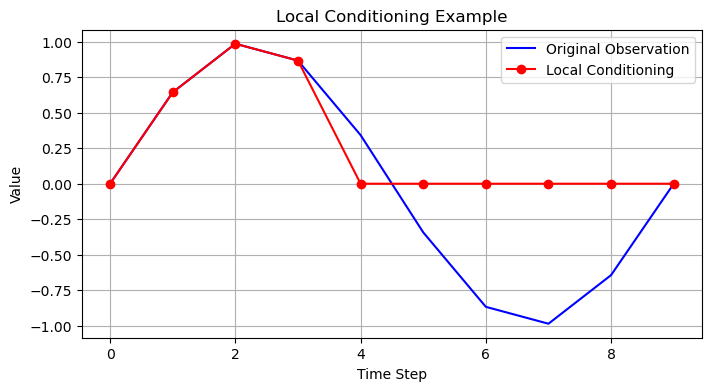

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torch
B= 1
T =10
Do= 1
To = 4 # 조건으로사용할 타임스텝수 (LOcal Condition)

#예제 0~2pi 구간에서 사인파 생성 

t = np.linspace(0, 2*np.pi, T) # 0~2pi 구간에서 T(10)개의 점 생성
data = np.sin(t)
#nobs: 정규화된 관측 데이터
nobs = torch.tensor(data, dtype=torch.float32).view(B, T, Do)

#local_cond: 로컬 조건
#전체 시퀀스 길이 T, 관측 차원 Do의 텐서를 0으로 초기화 

local_cond = torch.zeros(size=(B, T, Do))
local_cond[:, :To] = nobs[:, :To]

#그래프 출력

print("Original Observations (nobs):")
print(nobs)
print("\nLocal Conditioned Data (local_cond):") #\n은 줄바꿈
print(local_cond)
plt.figure(figsize=(8, 4))
# 원본 관측 데이터: sine wave 전체
plt.plot(range(T), nobs[0, :, 0].numpy(), 'b-', label="Original Observation")
# Local Conditioning: 처음 To 타임스텝은 sine wave, 이후는 0
plt.plot(range(T), local_cond[0, :, 0].numpy(), 'ro-', label="Local Conditioning")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.title("Local Conditioning Example")
plt.legend()
plt.grid(True)
plt.show()


# 2.3 
### 슬라이싱 (python)

슬라이싱은 시퀀스 자료형(리스트, 문자열, 넘파이 배열, 파이토치 텐서 등) 에서 원하는 부분만 선택해 가져오는 방법입니다. 슬라이싱 구문은 일반적으로 [start:stop:step]의 형태로 사용된다.

sequence[start:stop:step]

start: 생략하면 0부터 시작

stop: 슬라이스 종료 인덱스

step: 몇칸씩 건너뛰며 선택할지. 기본값 1

In [1]:
lst = [0,1,2,3,4,5,6]

print(lst[2:5]) # 결과 [2,3,4] 2~4까지 출력
print(lst[:3])  # 결과 [0,1,2] 처음 3개 요소 0,1,2
print(lst[4:])  # 결과 [4,5,6] 출력
print(lst[::2]) # 결과 [0,2,4,6] 2칸씩 건너뛰어 출력

[2, 3, 4]
[0, 1, 2]
[4, 5, 6]
[0, 2, 4, 6]


다차원 배열에서의 슬라이싱
파이토치 텐서나 넘파이 등 다양한 다차원 자료형에서는 각 차원별로 슬라이싱을 지정할 수 있다. 각차원은 콤마(,) 로 구분 하여 슬라이싱 문법적용 

If x.shape = (B,L,Do)

x[:, :To]

첫번째 차원 (B)에 대해서는 :를 사용하여 모든 배치를 선택한다

두번째 차원 (L)에 대해서는 :To를 사용하여 인덱스 0부터 To-1 까지를 선택한다.

세번째 차원 (Do)는 슬라이싱 구문에서 명시하지 않으면 기본적으로 전체를 선택한다. 

result = x[:, :To]의 shape는 (B, To, Do)

코드에서 global_cond = nobs[:, :To].reshape(nobs.shape[0], -1)

이부분은 nobs 는 정규화된 관측 데이터를 담고있는 텐서로, 보통 shape가 (B, L, Do) # B: 배치, L 시퀀스, Do obs_dim

1) 슬라이싱 부터
(B, To, Do) 인 텐서로 만들어진다. 
T0 타임스텝의 관측데이터 포함 

2) reshape 메서드
nobs.shape[0]은 텐서의 첫번째 차원 크기 B를 의미한다. -1는 나머지 요소를 자동으로 계산 하라는 뜻이다

결과 (B,To, Do)에서 reshape 해서 --> (B, To X Do) 이렇게 된다

의도는 평탄화된 전역 벡터는 각 배치의 초기 관측 데이터를 하나의 벡터로 요약하여, 전역 조건으로서 모델에 전달됩니다. 

## 2.4 Global Conditioning: 관측 데이터의 전역 특성 추출

global_cond = nobs[:, :To].reshape(nobs.shape[0], -1)

nobs -> (B,L,Do) #배치, 시쿼스길이, obs의 차원

nobs[:,:To] -> (B, To, Do)

reshape -> (B, To X Do)


shape = (B, T, Da)
if self.pred_action_steps_only:
    shape = (B, self.n_action_steps, Da)

기본적으로 조건 데이터 (cond_data)의 shape를 (B, T, Da)

만일 pred_action_steps_only가 True이면, shape 는 (B, n_action_steps, Da)

cond_data = torch.zeros(size=shape, device=device, dtype=dtype)

cond_mask = torch.zeros_like(cond_data, dtype=torch.bool)

cond_data 지정된 shape를 0dmfh chrlghk gksek, cond_mask는 같은 크기의 불리언 텐서를 생성한다. 그리고 모든 값을 False로 초기 되는데, 이는 global conditioning 방식에서 cond_data에 대한 별도의 조건 강제가 필요 없음을 의미한다. 




Global Conditioning의 특징 및 사용 경우, 

전역 요약 : 초기 To 타임스텝의 관측 데이터를 하나의 벡터로 요약하여 전체 시퀀스 생성 시 전역 정보 제공 

정보의 압축, 효율성

why? 전반적인 컨텍스트가 중요한 경우, 모델 단순화, 행동 예측이 특정 타임스텝에 한정되어 있다면 해당옵션을 통해 조건 데이터 shape 를 줄여 모델이 집중, 



# 2.5 Condition through impainting

inpainting 방식으로 조건을 전달하는 부분, inpainting 방식은 행동과 관측 데이터를 결합하여 하나의 텐서로 만든 후, 그 중 관측값에 해당하는 영역에 조건을 강제

shape ={B, T , Da+Do}

이 방식은 모델이 행동과 관측정보를 동시에 생성하거나 고려할 수 있다. 

cond_data[:, :To, Da:] = nobs[:, :To]

    관측 데이터 nobs (shape: (B,T,Do)(B,T,Do) 또는 적어도 처음 ToTo​ 타임스텝의 데이터)가 cond_data의 관측 부분(마지막 DoDo 차원)에 복사됩니다.
    이로써 cond_data의 앞쪽 ToTo​ 타임스텝에 대해, 관측값 부분이 실제 관측 데이터로 채워집니다.

cond_mask[:, :To, Da:] = True

    cond_mask의 동일한 영역에 대해 True 값을 할당합니다.
    이는 나중에 sampling 과정에서 이 영역은 "조건으로 고정"되어 변경되지 않도록 강제하는 역할을 합니다.


Inpainting 방식은 행동과 관측 정보를 결합한 텐서를 만들어서, 모델이 전체 시퀀스를 생성할 때 관측값 영역은 반드시 주어진 실제 관측 데이터로 유지되도록 합니다.
여기서는 cond_data의 shape가 (B,T,Da+Do)(B,T,Da+Do)로 설정되어,

    처음 ToTo​ 타임스텝에서는 관측 부분 (마지막 DoDo 차원)에 대해 실제 관측 값 nobs가 채워집니다.
    cond_mask의 해당 영역은 True로 설정되어, 이후 sampling 과정에서 이 부분이 조건으로 고정됩니다.

나머지 부분(행동 부분 및 ToTo​ 이후의 관측 부분)은 0으로 남게 되며, 모델은 이 영역을 생성하거나 예측하게 됩니다.